# Explicacion variables

Date (object)

Representa la fecha en la que se registraron los datos, en formato YYYY-MM-DD (por ejemplo, "2008-12-01"). Es una variable categórica temporal que sirve como identificador o referencia temporal.


Location (object)

Indica la ubicación geográfica donde se tomaron las mediciones, como una ciudad o estación meteorológica (por ejemplo, "Albury"). Es una variable categórica que identifica el lugar.


MinTemp (float64)

Temperatura mínima registrada en el día, en grados Celsius.


MaxTemp (float64)

Temperatura máxima registrada en el día, en grados Celsius.


Rainfall (float64)

Cantidad de precipitación (lluvia) en milímetros registrada en el día.


Evaporation (float64)

Cantidad de evaporación registrada en milímetros, probablemente medida con un evaporímetro.


Sunshine (float64)

Número de horas de sol registradas en el día.


WindGustDir (object)

Dirección del viento más fuerte (ráfaga) del día, en términos de puntos cardinales (por ejemplo, "W" para oeste). 


WindGustSpeed (float64)

Velocidad en kilómetros por hora de la ráfaga de viento más fuerte del día.


WindDir9am (object)

Dirección del viento a las 9 de la mañana, en puntos cardinales (por ejemplo, "WNW" para oeste-noroeste).


WindDir3pm (object)

Dirección del viento a las 3 de la tarde, en puntos cardinales.

WindSpeed9am (float64)

Velocidad del viento en kilómetros por hora a las 9 de la mañana.


WindSpeed3pm (float64)

Velocidad del viento en kilómetros por hora a las 3 de la tarde.


Humidity9am (float64)

Humedad relativa en porcentaje a las 9 de la mañana. 


Humidity3pm (float64)

Humedad relativa en porcentaje a las 3 de la tarde.


Pressure9am (float64)

Presión atmosférica en hectopascales (hPa) a las 9 de la mañana.


Pressure3pm (float64)

Presión atmosférica en hectopascales (hPa) a las 3 de la tarde.


Cloud9am (float64)

Cantidad de nubosidad (en oktas, de 0 a 8) a las 9 de la mañana.


Cloud3pm (float64)

Cantidad de nubosidad a las 3 de la tarde.


Temp9am (float64)

Temperatura en grados Celsius a las 9 de la mañana.


Temp3pm (float64)

Temperatura en grados Celsius a las 3 de la tarde.


RainToday (object)

Indica si llovió o no el día actual, como "Yes" o "No".


RainTomorrow (object)

Predice si lloverá o no al día siguiente, como "Yes" o "No".

In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [29]:
df = pd.read_csv('weatherAUS.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Tratamiento nulos

In [33]:
# nulos por columna
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [34]:
# porcentaje de nulos por columna
porcentajes_nulos = (df.isna().sum() / len(df)) * 100

# Mostrar los resultados
print(porcentajes_nulos)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


Evaporation, Sunshine, Cloud9am, Cloud3pm tienen gran porcentaje de nulos

decidir que hacer   

# Dividir datos de entrenamiento y testeo

In [35]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116368, 22), (29092, 22), (116368,), (29092,))

In [37]:
df.shape

(145460, 23)

# Consigna 1 - Creacion de variable regiones

Se  solicita  en  primera  instancia  crear  clusters  con  las  ciudades del Dataset para 
catalogarlas en otra categoría: regiones. La cantidad de regiones será definida por 
cada  grupo,  observarlas  en  un  gráfico  de  latitud  y  longitud  para  acompañar  la 
decisión.

In [38]:
X_train["Location"].unique()

array(['Albany', 'Katherine', 'MelbourneAirport', 'Williamtown',
       'Adelaide', 'Nuriootpa', 'Albury', 'Mildura', 'Launceston',
       'Townsville', 'Cobar', 'Uluru', 'Brisbane', 'Darwin', 'Melbourne',
       'Portland', 'Cairns', 'Sydney', 'Sale', 'Dartmoor', 'AliceSprings',
       'Woomera', 'MountGinini', 'Ballarat', 'NorahHead', 'Tuggeranong',
       'PearceRAAF', 'MountGambier', 'Perth', 'Walpole', 'WaggaWagga',
       'Newcastle', 'Hobart', 'SydneyAirport', 'BadgerysCreek', 'Bendigo',
       'SalmonGums', 'Richmond', 'GoldCoast', 'Moree', 'CoffsHarbour',
       'Canberra', 'Watsonia', 'Witchcliffe', 'NorfolkIsland',
       'PerthAirport', 'Penrith', 'Nhil', 'Wollongong'], dtype=object)

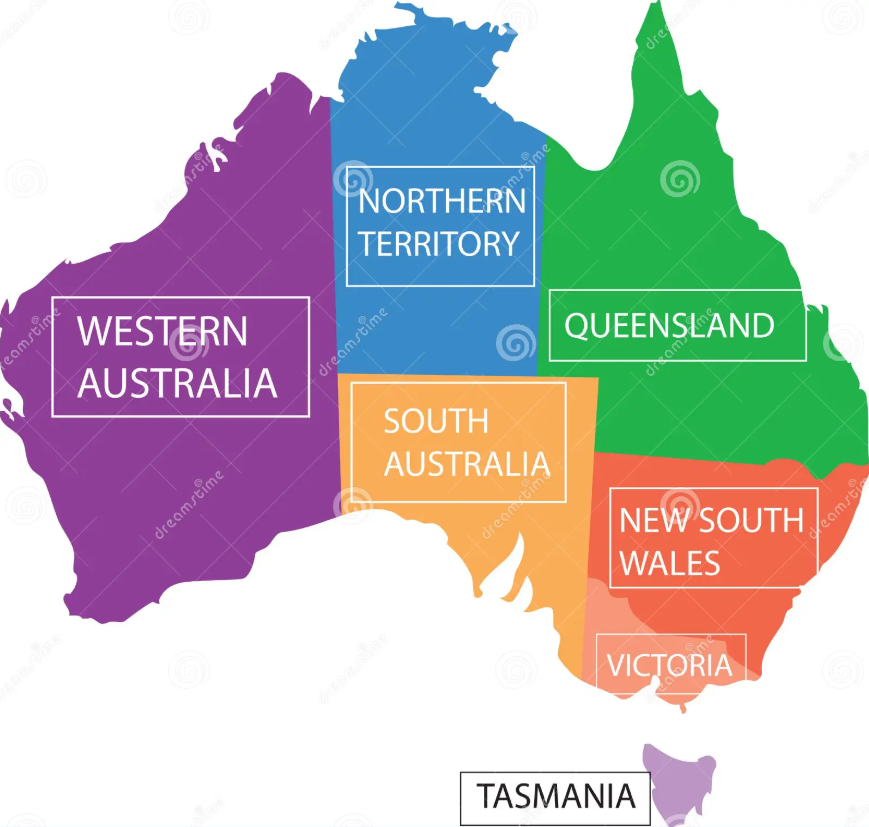

### Intento 1 - Agrupando por provincia

In [ ]:
# https://www.kaggle.com/datasets/maryamalizadeh/worldcities-australia?resource=download
df_aus = pd.read_csv('au.csv')

In [60]:
df_coordenadas.shape, df_aus.shape

((317, 9), (1035, 9))

In [59]:
df_aus.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


In [ ]:
# Diccionario para normalizar nombres de ubicaciones
normalizar_ubicaciones = {
    'MelbourneAirport': 'Melbourne',
    'SydneyAirport': 'Sydney',
    'PerthAirport': 'Perth',
    'PearceRAAF': 'Perth',
    'WaggaWagga': 'Wagga Wagga',  # Corregir formato
    'CoffsHarbour': 'Coffs Harbour',  # Corregir formato
    'MountGambier': 'Mount Gambier',  # Corregir formato
    'Tuggeranong': 'Canberra',  # Suburbio de Canberra
    'BadgerysCreek': 'Sydney',  # Suburbio de Sydney
    'NorahHead': 'Newcastle',  # Cerca de Newcastle
    'Penrith': 'Sydney',  # Suburbio de Sydney
    'Richmond': 'Sydney',  # Suburbio de Sydney
    'GoldCoast': 'Gold Coast',  # Corregir formato
    'NorfolkIsland': 'Norfolk Island',  # Isla externa
    'MountGinini': 'Canberra',  # Cerca de Canberra
    'Nhile': 'Nhill',  # Corregir error tipográfico
    'Watsonia': 'Melbourne',  # Suburbio de Melbourne
}

# Aplicar normalización a la columna Location
df['Location_normalized'] = df['Location'].replace(normalizar_ubicaciones)

# Crear diccionario de mapeo de ciudades a provincias desde df_aus
mapeo_ciudades = dict(zip(df_aus['city'], df_aus['admin_name']))

# Mapear admin_name usando la columna normalizada
df['admin_name'] = df['Location_normalized'].map(mapeo_ciudades)

# Opcional: Eliminar la columna temporal Location_normalized
df = df.drop(columns=['Location_normalized'])

In [71]:
print(df['admin_name'].isna().sum())

24239


In [75]:
df.loc[df['Location'] == 'NorfolkIsland', 'admin_name'] = 'Norfolk Island Territory'

df.loc[df['Location'] == 'Nhil', 'admin_name'] = 'Victoria'
df.loc[df['Location'] == 'Dartmoor', 'admin_name'] = 'Victoria'
df.loc[df['Location'] == 'Woomera', 'admin_name'] = 'South Australia'
df.loc[df['Location'] == 'Witchcliffe', 'admin_name'] = 'Western Australia'
df.loc[df['Location'] == 'SalmonGums', 'admin_name'] = 'Western Australia'
df.loc[df['Location'] == 'Walpole', 'admin_name'] = 'Western Australia'
df.loc[df['Location'] == 'AliceSprings', 'admin_name'] = 'Northern Territory'
df.loc[df['Location'] == 'Uluru', 'admin_name'] = 'Northern Territory'

In [76]:
# Listar Location y admin_name, eliminando duplicados
lista_ubicaciones = df[['Location', 'admin_name']].drop_duplicates()

# Mostrar la lista
print(lista_ubicaciones)

             Location                    admin_name
0              Albury               New South Wales
3040    BadgerysCreek               New South Wales
6049            Cobar               New South Wales
9058     CoffsHarbour               New South Wales
12067           Moree               New South Wales
15076       Newcastle               New South Wales
18115       NorahHead               New South Wales
21119   NorfolkIsland      Norfolk Island Territory
24128         Penrith               New South Wales
27167        Richmond               New South Wales
30176          Sydney               New South Wales
33520   SydneyAirport               New South Wales
36529      WaggaWagga               New South Wales
42547      Wollongong               New South Wales
45587        Canberra  Australian Capital Territory
49023     Tuggeranong  Australian Capital Territory
52062     MountGinini  Australian Capital Territory
55102        Ballarat                      Victoria
58142       

### Intentar obtener latitud y longitud

In [78]:
# Diccionario para normalizar nombres de ubicaciones
normalizar_ubicaciones = {
    'MelbourneAirport': 'Melbourne',
    'SydneyAirport': 'Sydney',
    'PerthAirport': 'Perth',
    'PearceRAAF': 'Perth',
    'WaggaWagga': 'Wagga Wagga',  # Corregir formato
    'CoffsHarbour': 'Coffs Harbour',  # Corregir formato
    'MountGambier': 'Mount Gambier',  # Corregir formato
    'Tuggeranong': 'Canberra',  # Suburbio de Canberra
    'BadgerysCreek': 'Sydney',  # Suburbio de Sydney
    'NorahHead': 'Newcastle',  # Cerca de Newcastle
    'Penrith': 'Sydney',  # Suburbio de Sydney
    'Richmond': 'Sydney',  # Suburbio de Sydney
    'GoldCoast': 'Gold Coast',  # Corregir formato
    'NorfolkIsland': 'Norfolk Island',  # Isla externa
    'MountGinini': 'Canberra',  # Cerca de Canberra
    'Nhile': 'Nhill',  # Corregir error tipográfico
    'Watsonia': 'Melbourne',  # Suburbio de Melbourne
}

# Aplicar normalización a la columna Location
df['Location_normalized'] = df['Location'].replace(normalizar_ubicaciones)
# Diccionarios de mapeo
mapeo_lat = dict(zip(df_aus['city'], df_aus['lat']))
mapeo_lon = dict(zip(df_aus['city'], df_aus['lng']))
# Usá Location_normalized para encontrar las coordenadas
df['lat'] = df['Location_normalized'].map(mapeo_lat)
df['lon'] = df['Location_normalized'].map(mapeo_lon)

# Opcional: Eliminar la columna temporal Location_normalized
df = df.drop(columns=['Location_normalized'])

In [80]:
df[['lat', 'lon']].isna().sum()

lat    24239
lon    24239
dtype: int64

In [87]:
# Listar Location y admin_name, eliminando duplicados
lista_ubicaciones = df[['Location', 'lat','lon']].drop_duplicates()

# Mostrar la lista
print(lista_ubicaciones)

             Location      lat       lon
0              Albury -36.0806  146.9158
3040    BadgerysCreek -33.8650  151.2094
6049            Cobar -31.4997  145.8319
9058     CoffsHarbour -30.3022  153.1189
12067           Moree -29.4650  149.8344
15076       Newcastle -32.9167  151.7500
18115       NorahHead -32.9167  151.7500
21119   NorfolkIsland      NaN       NaN
24128         Penrith -33.8650  151.2094
27167        Richmond -33.8650  151.2094
30176          Sydney -33.8650  151.2094
33520   SydneyAirport -33.8650  151.2094
36529      WaggaWagga -35.1189  147.3689
42547      Wollongong -34.4331  150.8831
45587        Canberra -35.2931  149.1269
49023     Tuggeranong -35.2931  149.1269
52062     MountGinini -35.2931  149.1269
55102        Ballarat -37.5500  143.8500
58142         Bendigo -36.7500  144.2667
61182            Sale -38.1000  147.0667
64191       Melbourne -37.8136  144.9631
70393         Mildura -34.1889  142.1583
73402            Nhil      NaN       NaN
74980        Por

# Graficos

In [45]:
X_train["Date"] = pd.to_datetime(X_train["Date"], format="%Y-%m-%d")
X_train["year"] = X_train["Date"].dt.year
X_train["month"] = X_train["Date"].dt.month
X_train["day"] = X_train["Date"].dt.day
X_test["Date"] = pd.to_datetime(X_test["Date"], format="%Y-%m-%d")
X_test["year"] = X_test["Date"].dt.year
X_test["month"] = X_test["Date"].dt.month
X_test["day"] = X_test["Date"].dt.day

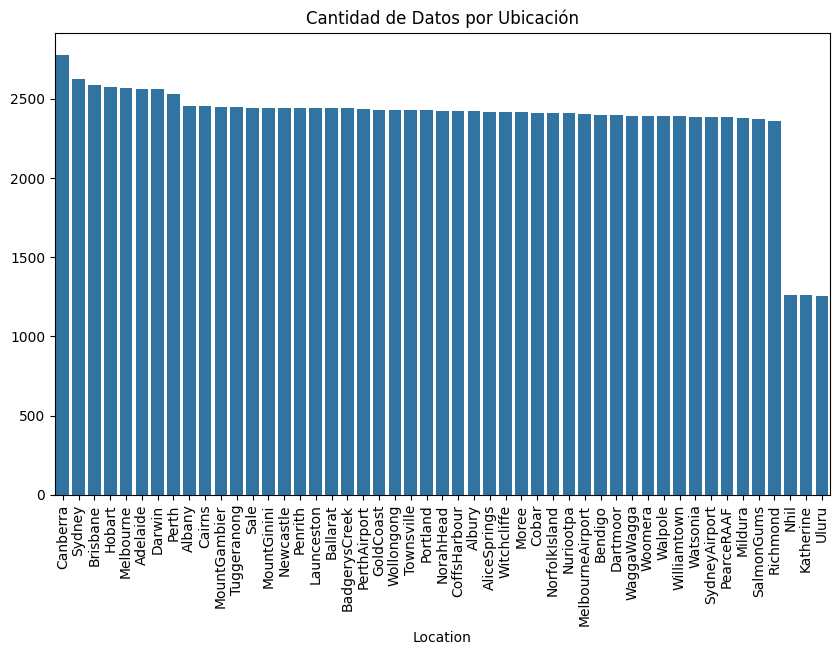

In [46]:
location_counts = X_train['Location'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Cantidad de Datos por Ubicación')
plt.xticks(rotation=90)
plt.show()

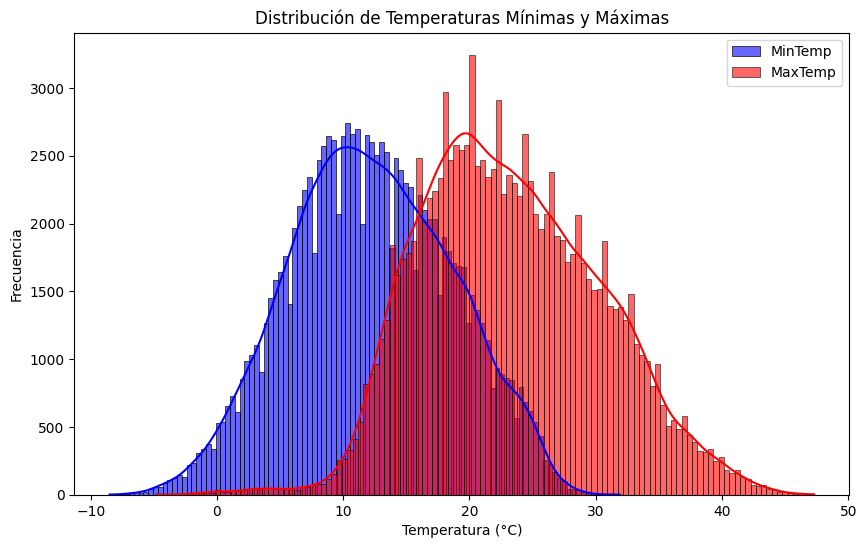

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x="MinTemp", color="blue", label="MinTemp", kde=True, alpha=0.6)
sns.histplot(data=X_train, x="MaxTemp", color="red", label="MaxTemp", kde=True, alpha=0.6)
plt.legend()
plt.title("Distribución de Temperaturas Mínimas y Máximas")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

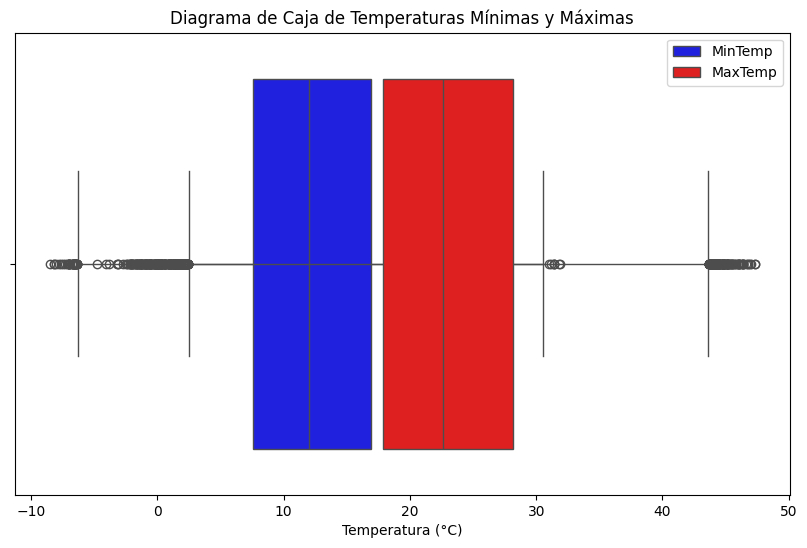

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x="MinTemp", color="blue", label="MinTemp")
sns.boxplot(data=X_train, x="MaxTemp", color="red", label="MaxTemp")
plt.title("Diagrama de Caja de Temperaturas Mínimas y Máximas")
plt.xlabel("Temperatura (°C)")
plt.show()

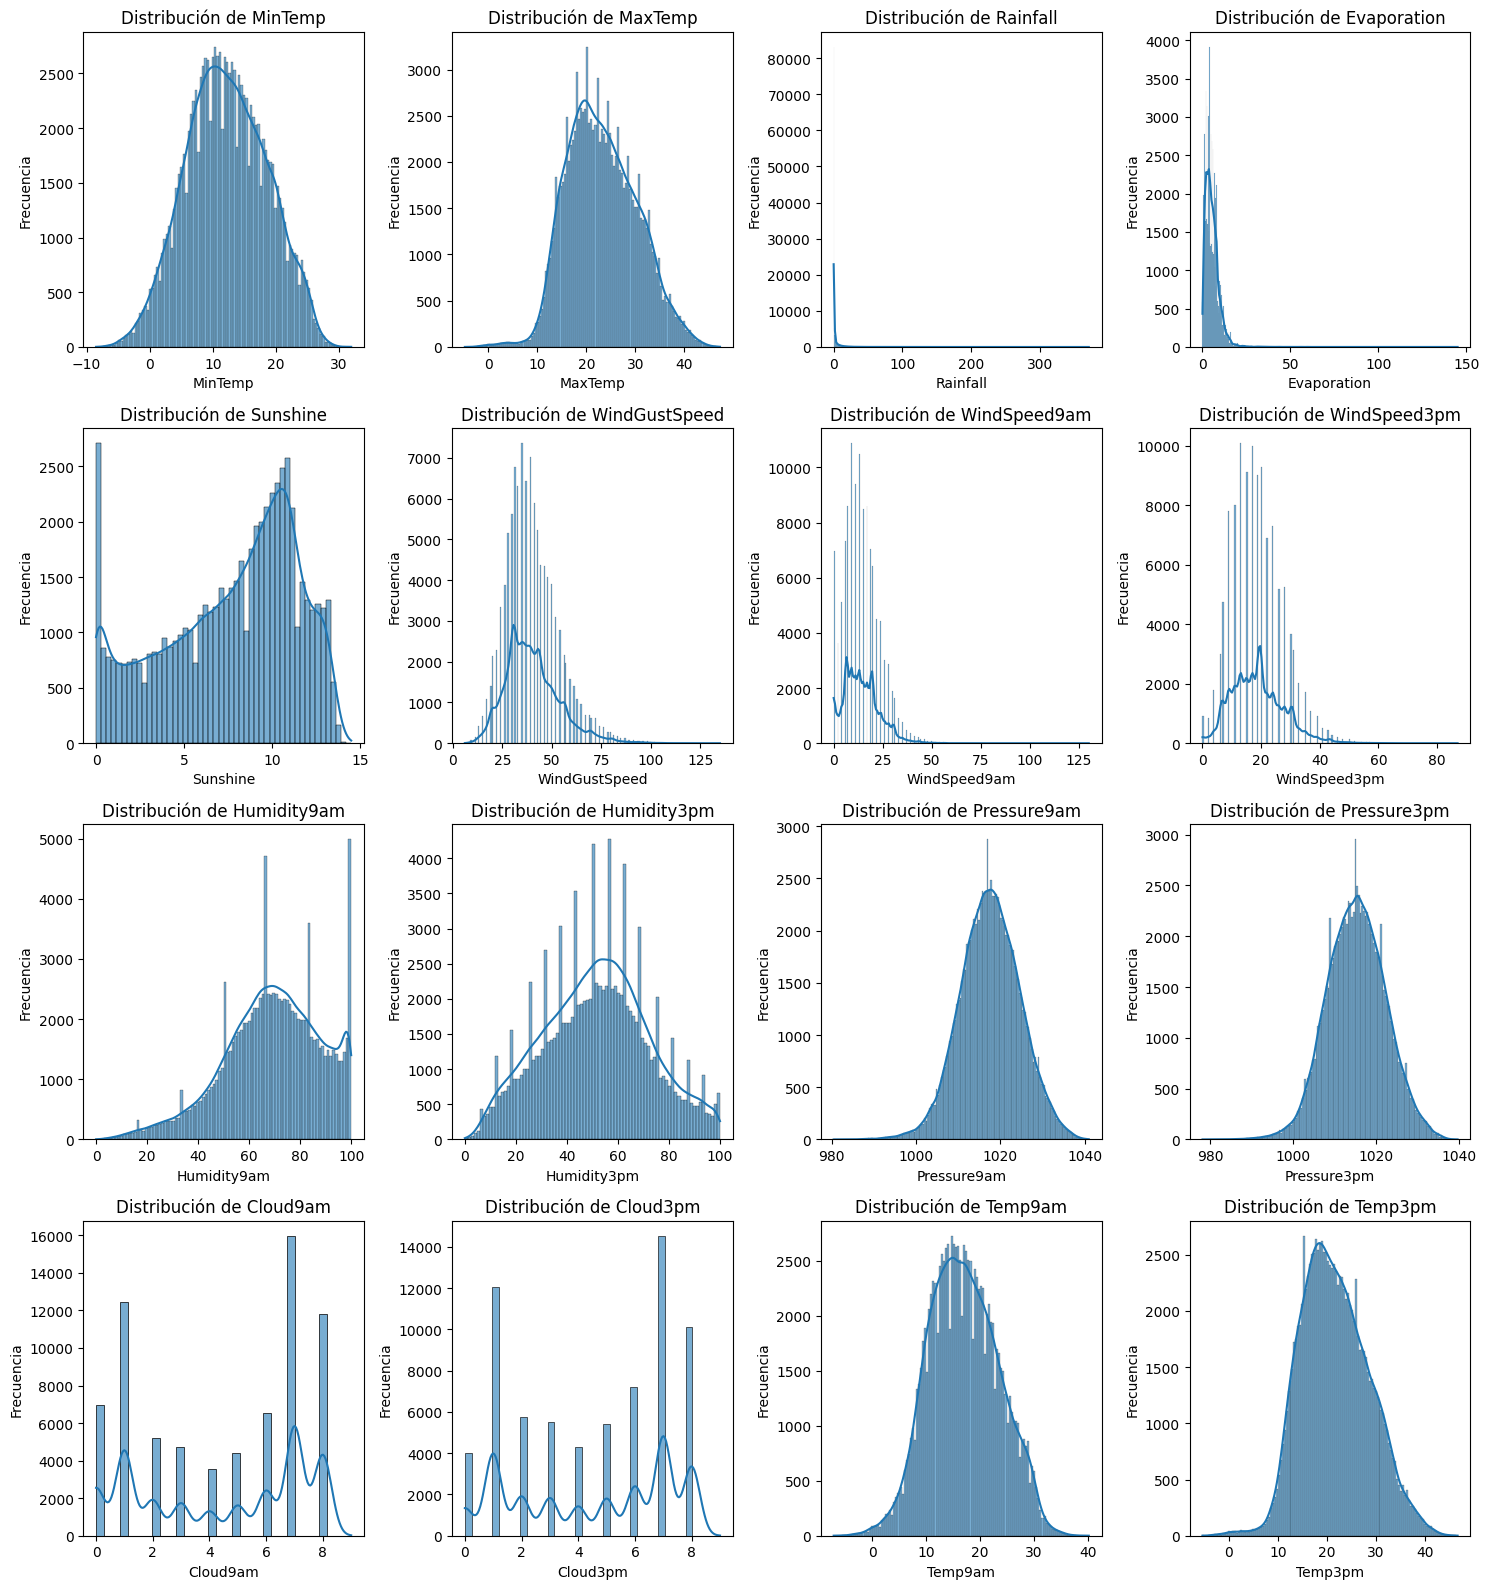

In [49]:
# Gráficos de distribución para todas las columnas numéricas

numeric_cols = X_train.select_dtypes(include=['float64']).columns

n_cols = 4 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 
plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X_train, x=column, kde=True, alpha=0.6)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

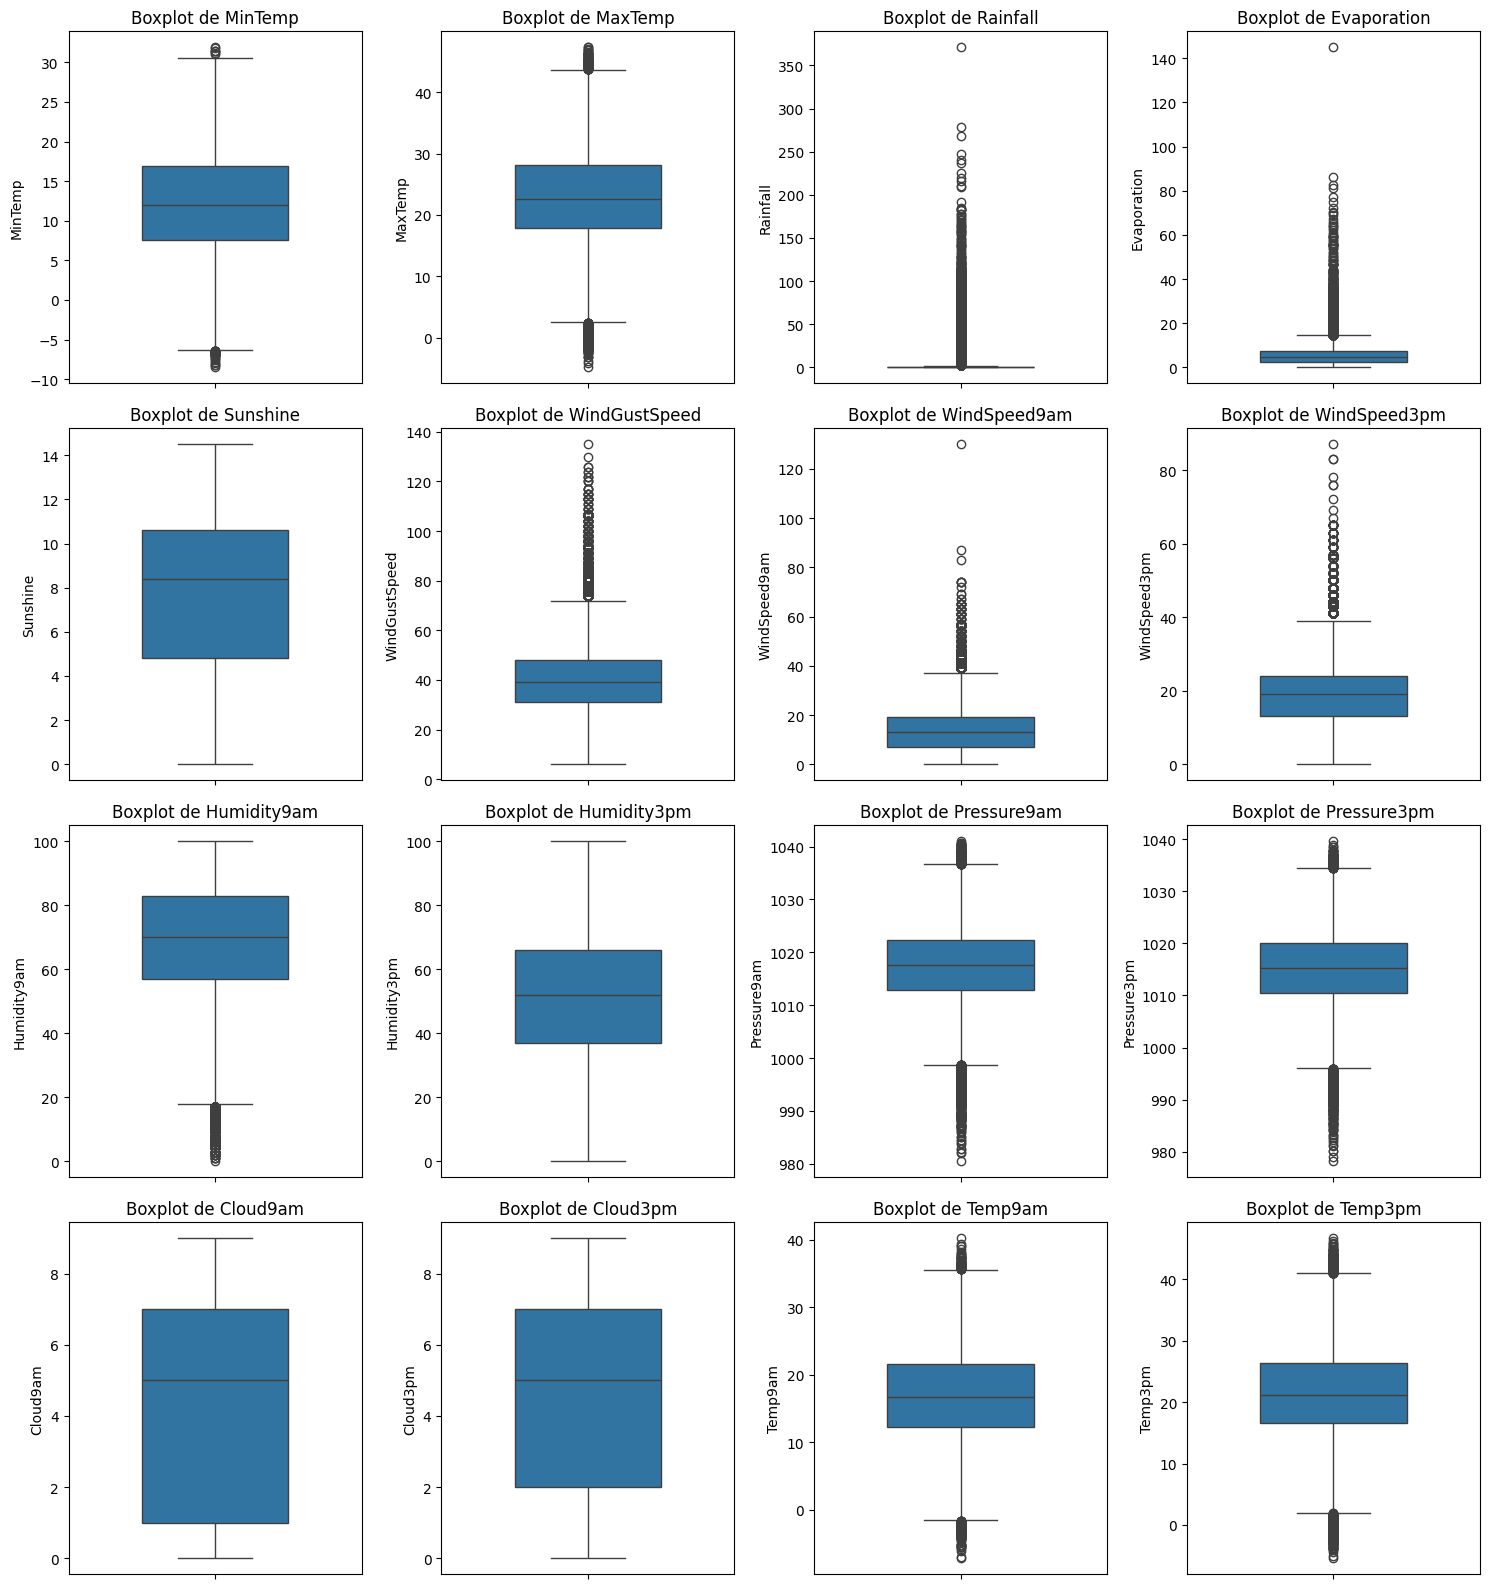

In [50]:
# Gráficos de boxplot para las columnas numéricas

numeric_cols = X_train.select_dtypes(include=['float64']).columns

n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, n_rows * 4)) 

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=X_train, y=column, width=0.5)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='RainTomorrow'>

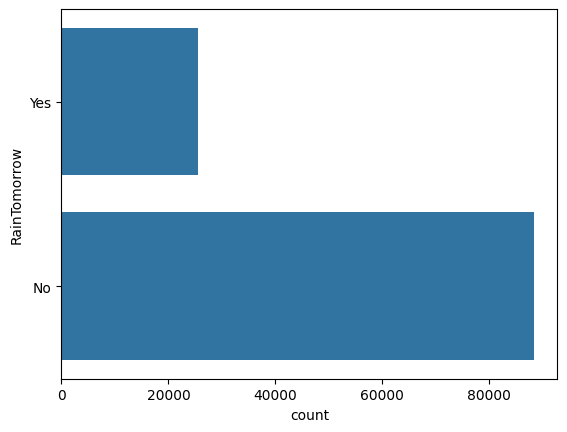

In [51]:
# variable objetivo
sns.countplot(y_train)

La variable objetivo esta bastante desbalanceada

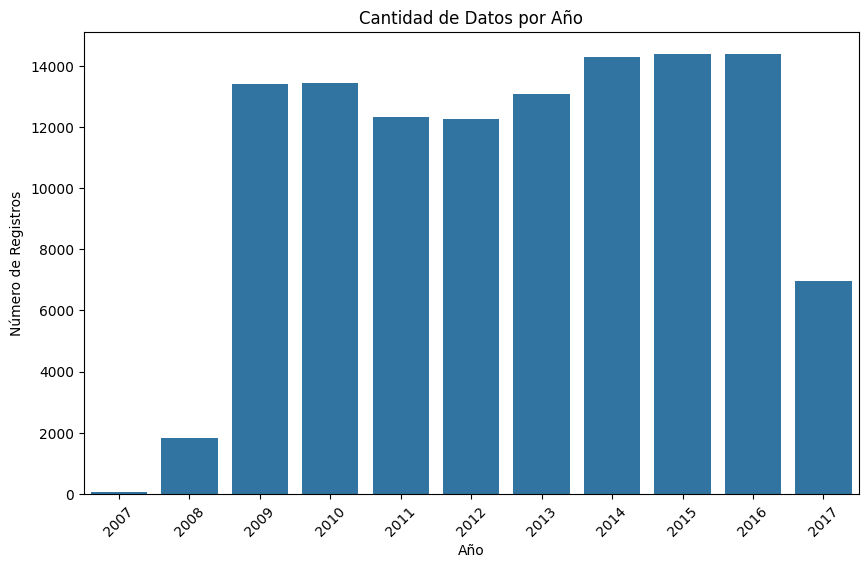

In [52]:
# Graficar Date
year_counts = X_train['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Cantidad de Datos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.show()

## Correlaciones

In [53]:
# Transformar y_train a categorica
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

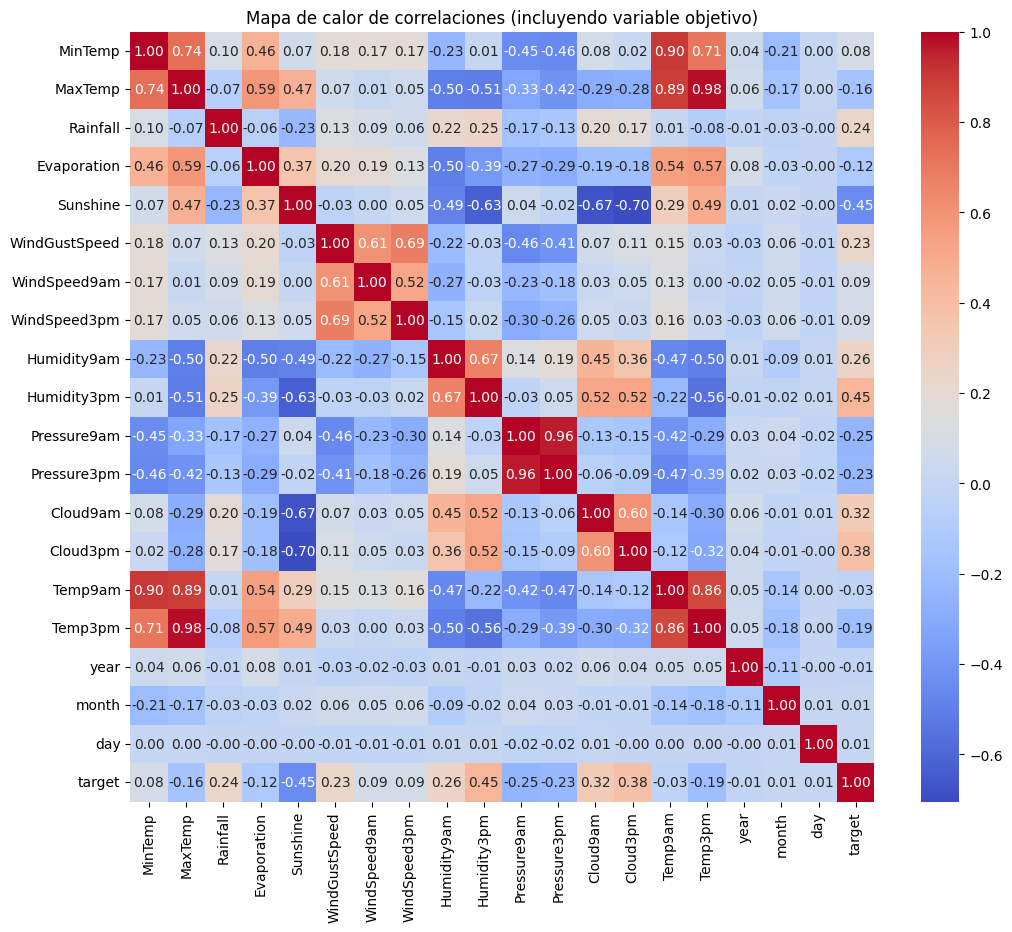

In [54]:
# Mapa de correlaciones incluyendo variable objetivo

data_combined = X_train.copy()
data_combined['target'] = y_train

data_combined_numeric = data_combined.select_dtypes(include=['float64', 'int64', "int32"])  # int32 son los datos de year, mouth y day

corr = data_combined_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones (incluyendo variable objetivo)")
plt.show()

Correlacion media entre la target y humidity3pm, cloud9am, cloud3pm, y correlacion negativa media con sunshine